In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1099,ham,Been up to ne thing interesting. Did you have ...,NaN,NaN,NaN
5225,ham,Smile in Pleasure Smile in Pain Smile when tro...,NaN,NaN,NaN
2285,ham,"Hi, wkend ok but journey terrible. Wk not good...",NaN,NaN,NaN
4422,ham,alright. Thanks for the advice. Enjoy your nig...,NaN,NaN,NaN
3424,ham,True. Its easier with her here.,NaN,NaN,NaN
2029,ham,Thanx but my birthday is over already.,NaN,NaN,NaN
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
4086,spam,PRIVATE! Your 2003 Account Statement for 07973...,NaN,NaN,NaN
2105,ham,I fetch yun or u fetch?,NaN,NaN,NaN
1260,ham,"Yo, I'm at my parents' gettin cash. Good news:...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


5 columns and 5572 rows 

## Data Cleaning

In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# clearly 3 columns of last have a lot of null values so it be better to remove them
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True,axis = 1) 

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# lets rename the columns
df.rename(columns = {'v1':'output','v2':'mail_text'},inplace =True)

In [9]:
# lets encode our output
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['output']=encoder.fit_transform(df['output'])

In [10]:
df.head()

,output,mail_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking for duplicate values
df.duplicated().sum()

403

In [12]:
# Their are a lot duplicate values lets remove them
df.drop_duplicates(keep = 'first',inplace = True)

In [13]:
df.duplicated().sum()

0

## EDA

In [14]:
# Lets understand the data
# lets check the target distribution
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64


We have ubalenced data

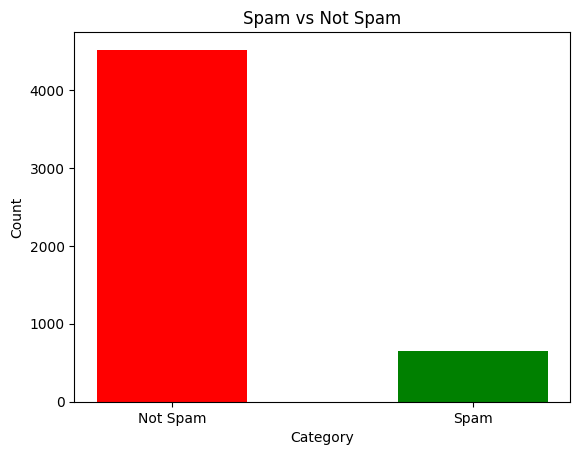

In [15]:
import matplotlib.pyplot as plt

# Assuming 'output' is the column name in your DataFrame
output_counts = df['output'].value_counts()

# Plotting the bar graph
plt.bar(x = ['Not Spam','Spam'], height = output_counts.values, color=['red', 'green'],width = 0.5)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Spam vs Not Spam')
plt.show()


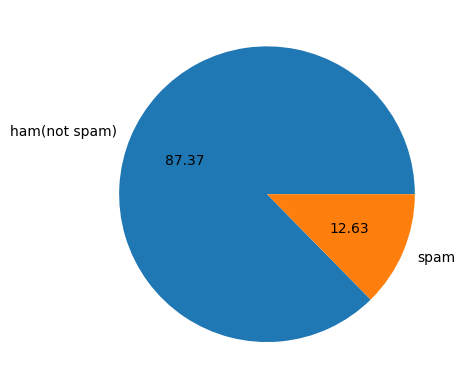

In [16]:
# pie graph
plt.pie(df['output'].value_counts(),labels=['ham(not spam)','spam'],autopct = '%.2f')
plt.show()

As we have unbalenced data we can use algorithims that handle unbalenced data well like ensemble methods - RandomForest or Boosting algorithms like XGBoost, LightBGM

In [17]:
# Lets analyze text
import nltk   # natural language toolkit
nltk.download('punkt')
# 'punkt' refers to the Punkt tokenizer, which is a sentence tokenizer included in NLTK. 
# It's used to segment text into sentences. 
# This line ensures that the necessary tokenizer is available for text processing.

[nltk_data] Downloading package punkt to /home/suraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df.head(4)

,output,mail_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [19]:
# here we will make 3 new columns : characters, words, sentences in sms

# find total character
df['num_char'] = df['mail_text'].apply(len)

In [20]:
df

,output,mail_text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
# total words
df['mail_text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: mail_text, Length: 5169, dtype: object

In [22]:
df['num_words'] = df['mail_text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
# Total sentences
df['num_sent'] = df['mail_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.sample(3)

,output,mail_text,num_char,num_words,num_sent
175,0,Let me know when you've got the money so carlo...,65,15,1
1080,0,You tell what happen dont behave like this to ...,67,16,2
3749,0,"Buzz! Hey, my Love ! I think of you and hope y...",158,41,6


In [25]:
# lets check it statistically
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# lets check specifically for ['ham','spam']

df[df['output']==0].describe()

,output,num_char,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
df[df['output'] == 1].describe()

,output,num_char,num_words,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


mean of ham is less than mean  of spam

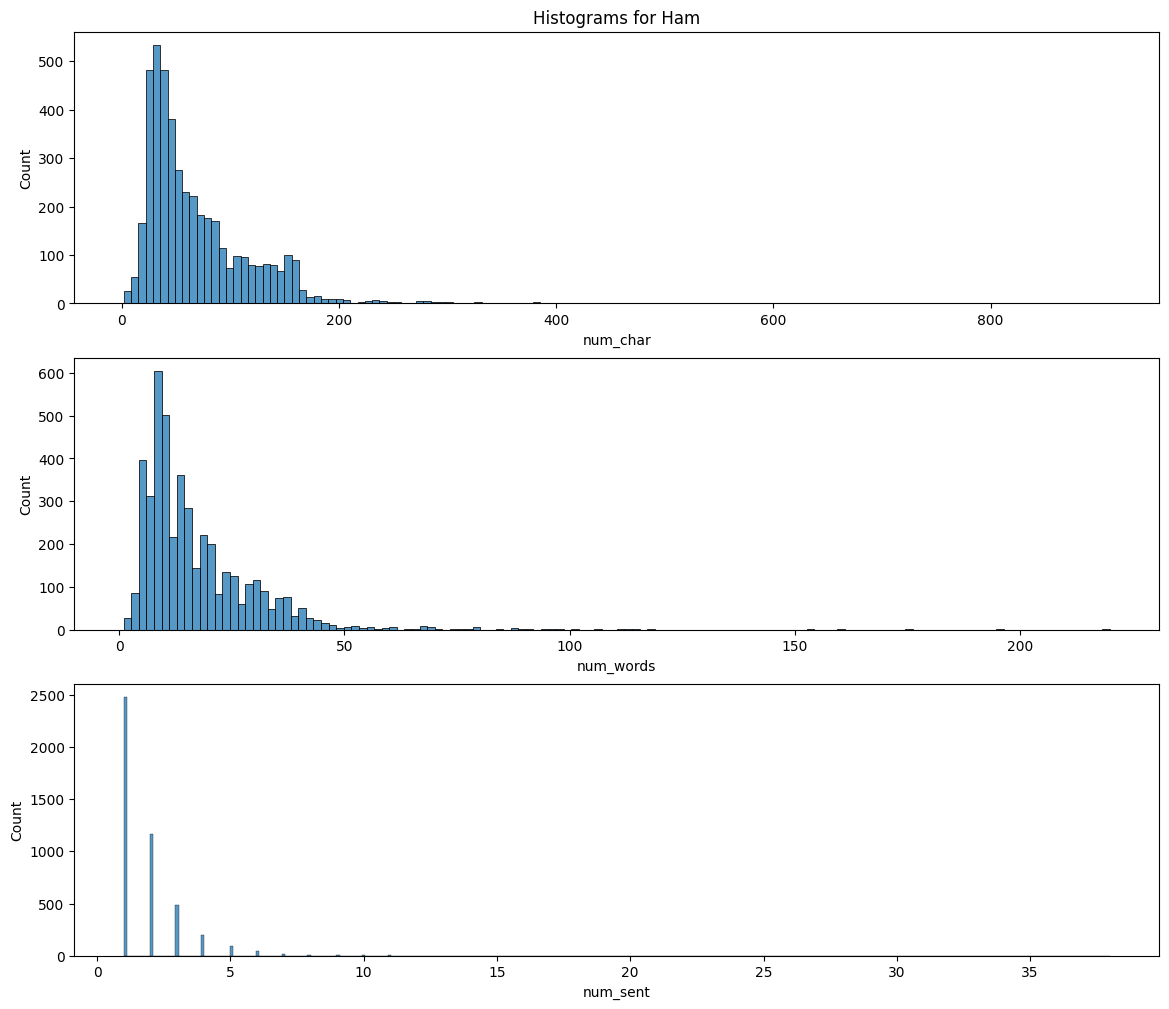

In [28]:
# lets plot them for 
import seaborn as sns
plt.figure( figsize = (14,12))
col = ['num_char','num_words','num_sent']

for i  in range(3):
    plt.subplot(3,1,i+1)
    sns.histplot(df[df['output']==0][col[i]])
    if(i==0):
        plt.title('Histograms for Ham')
plt.show()

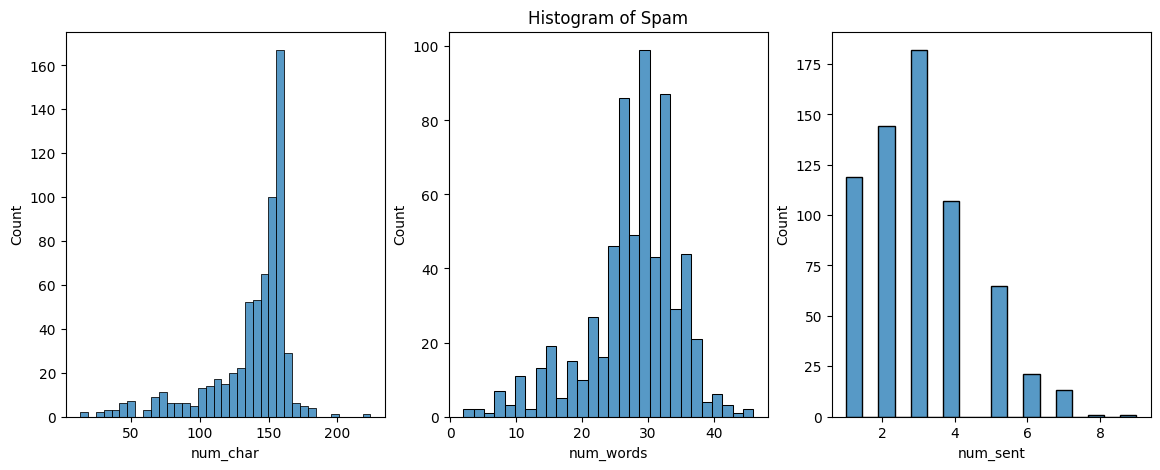

In [29]:
# Histogram for  spam
plt.figure(figsize = (14,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.histplot(df[df['output'] == 1][col[i]])
    if(i==1):
        plt.title('Histogram of Spam')
plt.show()

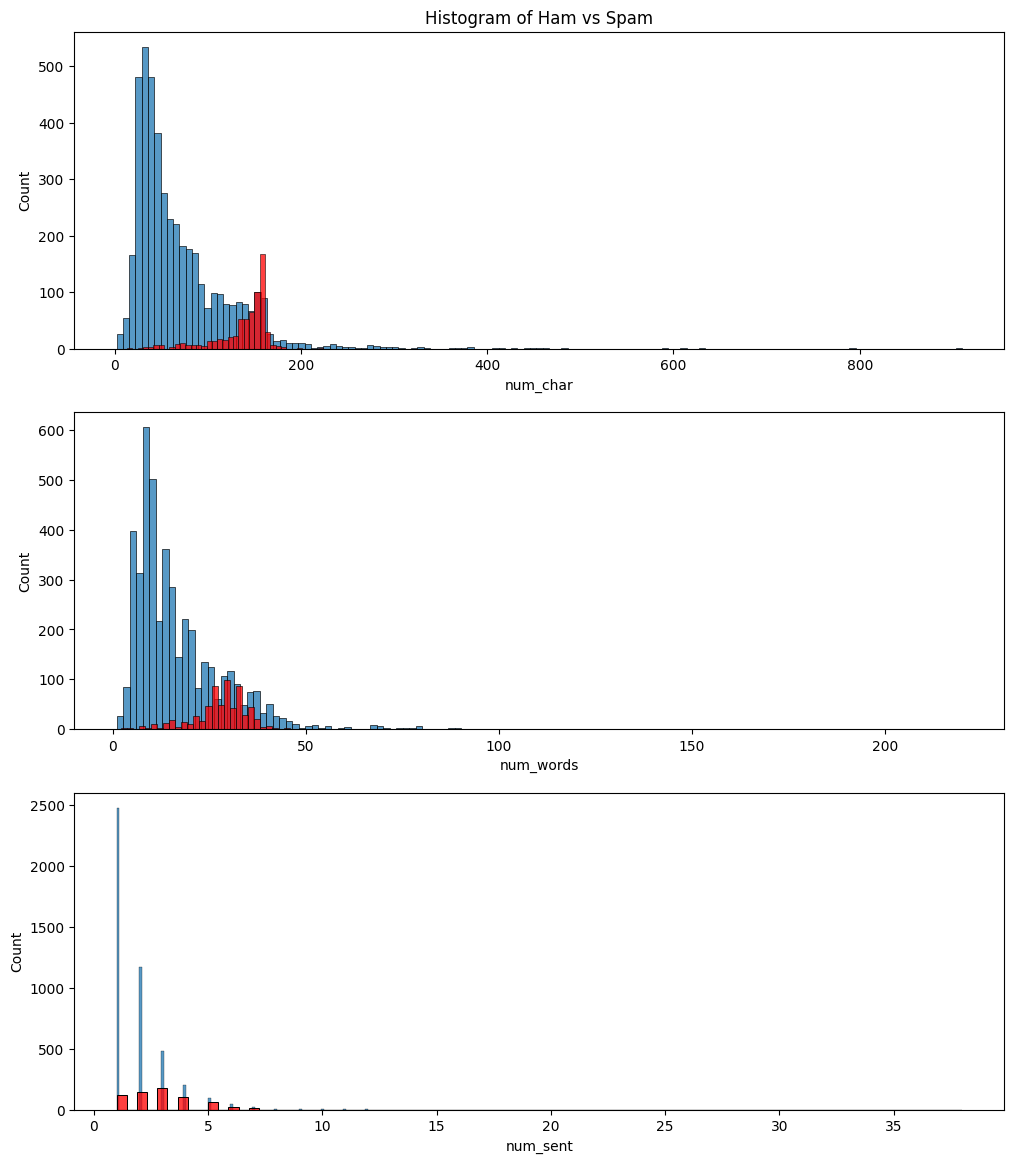

In [30]:
# or we can visulaize both together
plt.figure(figsize = (12,14))

for i in range(3):
    plt.subplot(3,1,i+1)
    sns.histplot(df[df['output'] == 0][col[i]])
    sns.histplot(df[df['output'] == 1][col[i]],color = 'red')
    if(i==0):
        plt.title('Histogram of Ham vs Spam')
plt.show()

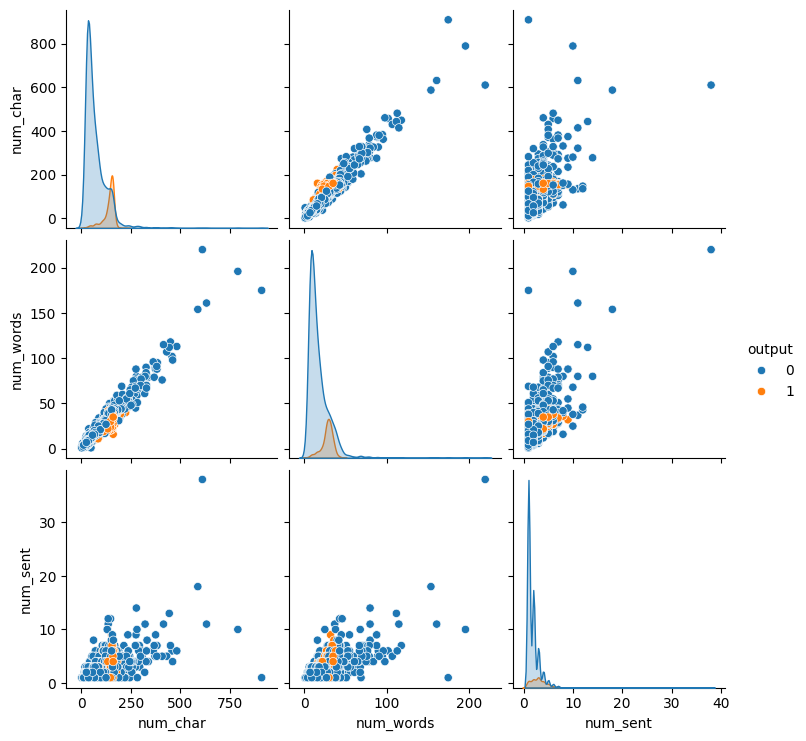

In [31]:
# To see the relationship between each other we can use pair plot
sns.pairplot(df,hue = 'output')
plt.show()

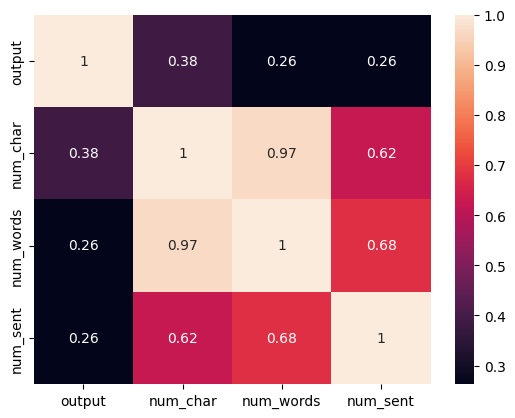

In [32]:
# lets see the correlation 
sns.heatmap(df[['output','num_char','num_words','num_sent']].corr(),annot = True)
plt.show()

Their is high collinearity between words, sentence and characters which has to be.
Therefore we will use only one of them to tackle multicollinearity in model.

## Data Preprocessing

In [33]:
#  Lets make function that will transform the text

def transform_txt(text):
    #1. lowercase
    text = text.lower()
    # 2. Tokenizing
    text = nltk.word_tokenize(text)
    #3. Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # 4. removing stopwords
    text = list(y)
    y.clear()  # this will clear the list y
    for i in text:
        if i in stopwords.words('english') or i in string.punctuation:
            continue
        else:
            y.append(i)

    #5.  stemming
    text = list(y)
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
import nltk

# Download NLTK resources including stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/suraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Punctuation
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

**Here quick guide which is better lemmatization or stemming**
Choosing between lemmatization and stemming depends on the specific use case and the trade-offs you're willing to accept:

1. **Stemming**:
   - **Pros**: It's faster and simpler than lemmatization as it chops off the ends of words based on simple rules without considering the context. Stemmed words are usually good enough for tasks like indexing or search where the context of the word isn't critical.
   - **Cons**: It can result in words that aren't actual words (e.g., "goes" might be stemmed to "go" but "going" might be stemmed to "go" as well). This can lead to some loss of meaning or ambiguity in the text.

2. **Lemmatization**:
   - **Pros**: It aims to transform words to their base or dictionary form (lemma) considering the context of the word in the sentence. This can result in more accurate words that are meaningful and interpretable.
   - **Cons**: Lemmatization is generally slower and more complex than stemming because it requires dictionary lookups or more sophisticated linguistic rules.

**Use Cases**:
- For information retrieval tasks like search engines or text indexing, stemming might be preferred due to its simplicity and speed.
- In applications where semantic meaning is crucial (e.g., sentiment analysis, machine translation, question answering systems), lemmatization might be more appropriate to maintain the integrity of the words.

In summary, if speed and simplicity are more important and a slight loss of accuracy is acceptable, stemming might be suitable. However, if preserving semantic meaning and accuracy is crucial, especially in NLP applications, lemmatization is preferred despite its computational overhead. Often, the choice depends on the specific requirements of your project and the balance between accuracy and efficiency you're aiming for.

In [37]:
transform_txt('hello [Hello] this is suraj dancing!!')

'hello hello suraj danc'

In [38]:
# Transform the text
df['transformed_text'] = df['mail_text'].apply(transform_txt)

In [39]:
df.head(4)

,output,mail_text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [40]:
df['mail_text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [42]:
!pip install --upgrade pip
!pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


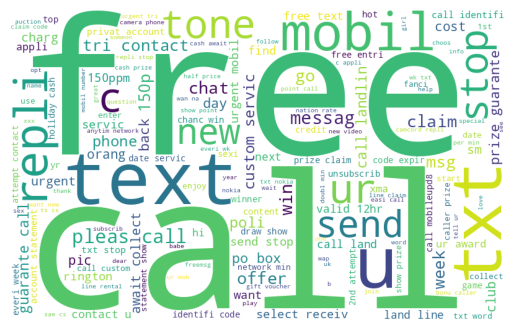

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df[df['output'] == 1]['transformed_text'].str.cat(sep=" ")

wc = WordCloud(
    width=800,
    height=500,
    min_font_size=10,
    background_color='white'
)

spam_wc = wc.generate(text)

plt.imshow(spam_wc)
plt.axis('off')  
plt.show()


In [45]:
ham_text = df[df['output']==0]['transformed_text'].str.cat(sep = " ")
ham_wc = wc.generate(ham_text)

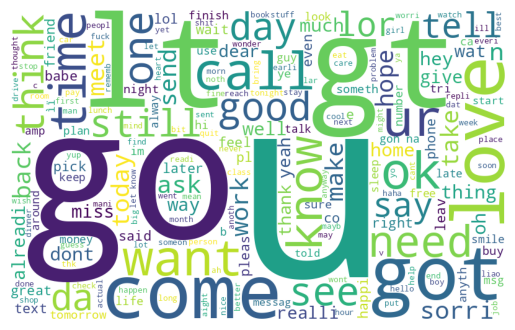

In [48]:
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

#### Most common word used in ham and spam corpus

In [50]:
# top  words  used in ham and spam mail
# text

In [51]:
df[df['output']==0]['transformed_text'].tolist()[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [52]:
word_ham_corpus = []
for i in df[df['output']==0]['transformed_text'].tolist():
    word_ham_corpus += i.split()

In [53]:
word_ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

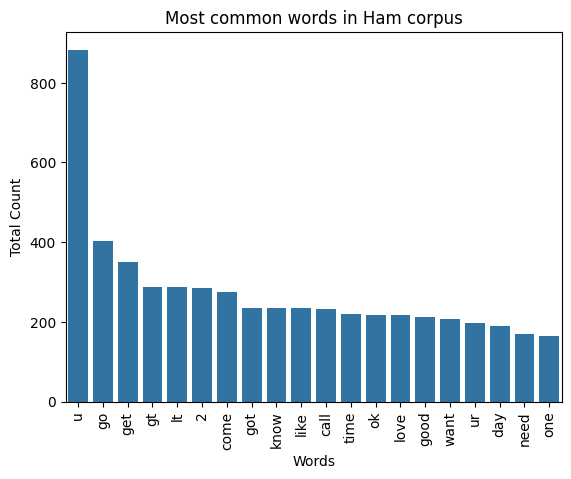

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(word_ham_corpus).most_common(20))[0],y = pd.DataFrame(Counter(word_ham_corpus).most_common(20))[1])
plt.xticks(rotation = 'vertical')
# sns.color_palette("flare", as_cmap=True)
plt.title("Most common words in Ham corpus")
plt.xlabel('Words')
plt.ylabel('Total Count')
plt.show()

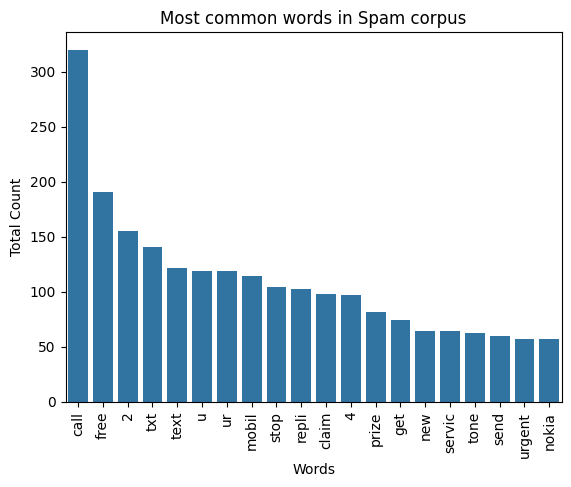

In [55]:
word_spam_corpus = []

for i in df[df['output'] == 1]['transformed_text']:
    word_spam_corpus += i.split()
sns.barplot(x=pd.DataFrame(Counter(word_spam_corpus).most_common(20))[0],y = pd.DataFrame(Counter(word_spam_corpus).most_common(20))[1])
plt.xticks(rotation = 'vertical')
# sns.color_palette("flare", as_cmap=True)
plt.title("Most common words in Spam corpus")
plt.xlabel('Words')
plt.ylabel('Total Count')
plt.show()

## 4.Model building

In [56]:
# first vectorize it
# BOW -count vectorizer
# tfidf with max_feature = 3000
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer # we can also tfidf
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000) # we are using max_feature 3000 as it was giving us beset value


In [57]:
# X = cv.fit_transform(df['transformed_text']).toarray()
tfidf = tfidf.fit(df['transformed_text'])
X = tfidf.transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 3000)

In [59]:
y = df['output'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 100,test_size = 0.3)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gn = GaussianNB()
mn = MultinomialNB()
bn = BernoulliNB()

### Gaussian Naive Bayes

In [63]:
gn.fit(X_train,y_train)
y_pred1 = gn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8620245003223727

In [65]:
accuracy_score(y_test,y_pred1)

0.8620245003223727

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1362
           1       0.46      0.84      0.60       189

    accuracy                           0.86      1551
   macro avg       0.72      0.85      0.76      1551
weighted avg       0.91      0.86      0.88      1551



In [67]:
from sklearn.metrics import confusion_matrix,precision_score
print(confusion_matrix(y_test,y_pred1))
print('---------------')
print(precision_score(y_test,y_pred1))

[[1178  184]
 [  30  159]]
---------------
0.46355685131195334


**Very  low precision score**

### Multinonmial NB

In [68]:
mn.fit(X_train,y_train)
y_pred2 = mn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.9729206963249516

In [69]:
from sklearn.metrics import confusion_matrix,precision_score
print(confusion_matrix(y_test,y_pred2))
print('---------------')
print(precision_score(y_test,y_pred2))

[[1362    0]
 [  42  147]]
---------------
1.0


**In multinomial we got muuch better precision score than gaussian but as it is imbalenced data precision score matters more than accuracy**

**Also with tfidf its precision score is higher**

### Bernoulli NB

In [70]:
bn.fit(X_train,y_train)
y_pred3 = bn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.9761444229529336

In [71]:
from sklearn.metrics import confusion_matrix,precision_score
print(confusion_matrix(y_test,y_pred3))
print('---------------')
print(precision_score(y_test,y_pred3))

[[1357    5]
 [  32  157]]
---------------
0.9691358024691358


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1362
           1       0.97      0.83      0.89       189

    accuracy                           0.98      1551
   macro avg       0.97      0.91      0.94      1551
weighted avg       0.98      0.98      0.98      1551



**In Bernoulli we got muuch better precision score than gaussian and Multinomial**
**but precision of multinomial is higher**

# When to use what metrics

Certainly! Focusing on specific metrics for model performance largely depends on the nature of the problem you're trying to solve and what aspect of the model's behavior is most critical in that context. Here are some scenarios where you might want to emphasize particular metrics:

### Classification Problems:

1. **Imbalanced Classes:** When dealing with imbalanced classes, accuracy might not be the best metric. Consider metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) to evaluate how well your model predicts the minority class or overall performance.

2. **Cost of Errors:** If the cost of false positives and false negatives is significantly different, precision-recall trade-off or a custom metric tailored to your specific costs could be more crucial than standard metrics.

### Regression Problems:

1. **Outliers:** Mean absolute error (MAE) or mean squared error (MSE) could be useful. However, if outliers significantly affect predictions, metrics like mean absolute percentage error (MAPE) or root mean squared logarithmic error (RMSLE) might provide better insights.

2. **Robustness to Variations:** R-squared (coefficient of determination) is commonly used, but it doesn't consider prediction variations. Mean absolute error (MAE) or mean squared error (MSE) could help in understanding how much predictions deviate from actual values.

### Time-Series Problems:

1. **Forecast Accuracy:** Metrics like mean absolute percentage error (MAPE), root mean squared error (RMSE), or mean absolute error (MAE) can be crucial to evaluate forecasting accuracy.

2. **Seasonality and Trends:** Metrics that measure how well the model captures seasonality and trends, such as autocorrelation or cross-validation techniques, could be important.

### NLP and Text Analysis:

1. **Classification:** Precision, recall, F1-score, or accuracy are often used for sentiment analysis or text classification tasks.

2. **Text Generation:** BLEU score, perplexity, or human evaluation could be important in assessing the quality of generated text.

### Recommendations and Clustering:

1. **Recommendation Systems:** Precision at K, recall at K, or Mean Average Precision (MAP) could be crucial for evaluating how well the system suggests items.

2. **Clustering:** Metrics like silhouette score or Davies-Bouldin index can help assess the quality of clustering.

### Interpretability:

If interpretability is critical, consider using simpler models or models that inherently provide interpretability, even if they may have slightly lower predictive performance.

Ultimately, it's essential to consider the specific goals of your project and the context in which your model will be deployed when choosing evaluation metrics. Often, using multiple metrics together can provide a more comprehensive understanding of the model's performance.

# what model should we use when we have imbalanced classes

When dealing with imbalanced classes, choosing the right model depends on several factors, including the dataset size, class distribution, interpretability requirements, computational resources, and the trade-offs between different evaluation metrics. Here are several approaches and models commonly used for imbalanced classification tasks:

### 1. Resampling Techniques:

- **Undersampling:** Randomly remove samples from the majority class to balance the class distribution.
- **Oversampling:** Increase the number of samples in the minority class by replicating or generating new synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

### 2. Algorithmic Approaches:

- **Algorithm-Specific Techniques:** Certain algorithms handle imbalanced data better:
  - **Ensemble Methods:** Random Forests, Gradient Boosting (XGBoost, LightGBM), and AdaBoost often handle imbalanced data well due to their ability to learn from misclassified samples.
  - **SVM with Class Weights:** SVMs with adjusted class weights can perform well with imbalanced data.
  - **Decision Trees and Pruning:** Decision trees can be sensitive to class imbalance, but tuning parameters like maximum depth or minimum samples per leaf can help mitigate this.

### 3. Cost-Sensitive Learning:

- **Cost-Sensitive Methods:** Adjust the misclassification costs for different classes to reflect the imbalance's impact on the overall model performance.

### 4. Model Evaluation Metrics:

- **Use Appropriate Metrics:** F1-score, precision, recall, AUC-ROC (Area Under the ROC Curve), and PR AUC (Precision-Recall Area Under the Curve) are more informative than accuracy when classes are imbalanced.

### 5. Deep Learning:

- **Neural Networks:** Deep learning models can be effective for imbalanced data, especially when combined with techniques like class weighting, focal loss, or oversampling within the network.

### Tips for Model Selection:

1. **Start with Simple Models:** Logistic Regression or Decision Trees can serve as good starting points due to their simplicity and interpretability.

2. **Ensemble Methods:** Random Forests or Gradient Boosting techniques often perform well out-of-the-box on imbalanced datasets.

3. **Domain Knowledge:** Consider the domain-specific factors that might influence the choice of a model. Sometimes, simpler models might perform better due to their interpretability.

4. **Cross-Validation:** Regardless of the model choice, ensure robust evaluation using techniques like cross-validation to validate the model's generalization performance.

5. **Model Tuning:** Hyperparameter tuning is crucial for achieving the best performance. Grid search or randomized search for hyperparameter optimization can improve model performance.

Experimentation and testing different approaches on your specific dataset are crucial. No single model works best universally, so it's often beneficial to compare multiple models and techniques to find the most suitable one for your imbalanced classification task.

### Balancing datasets in regression, classification, and NLP tasks can significantly impact the performance of machine learning models. Here are techniques specific to each domain:

### Regression:

1. **Sampling Methods:**
   - **Stratified Sampling:** For continuous target variables, stratified sampling based on quantiles or specific ranges can balance the dataset.
   - **Resampling Techniques:** Random oversampling or undersampling techniques applied to the target variable's values can balance the dataset.

2. **Target Transformation:**
   - **Log Transformation:** If the regression task involves predicting skewed or non-normally distributed continuous targets, transforming the target variable using logarithm or Box-Cox transformation can help balance the data.

### Classification:

1. **Resampling Techniques:**
   - **Oversampling:** Methods like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN generate synthetic samples for minority classes.
   - **Undersampling:** Randomly remove samples from the majority class to balance the dataset.

2. **Cost-Sensitive Learning:**
   - **Adjusting Class Weights:** Assign different misclassification costs to different classes to address imbalance during model training.

### NLP (Natural Language Processing):

1. **Text Preprocessing:**
   - **Downsampling:** Reduce the occurrence of words in the majority class in text data to balance the dataset.
   - **Upsampling or Augmentation:** Increase instances of text data in minority classes by augmenting or creating new samples (e.g., using data augmentation techniques for text).

2. **Class Balancing for Downstream Tasks:**
   - **Stratification in Train-Test Split:** Ensure that train-test splits maintain class distribution ratios.
   - **Sample Weighting:** Assign different weights to samples based on class imbalance during model training in NLP tasks like text classification or sentiment analysis.

### General Techniques Across Domains:

1. **Ensemble Methods:**
   - **Ensemble Techniques:** Use ensemble methods like Random Forests, Gradient Boosting, or AdaBoost that inherently handle imbalanced data better due to their ensemble nature.

2. **Data Augmentation:**
   - **Generating Synthetic Data:** In some cases, generating synthetic data or augmenting existing data for minority classes can balance the dataset.

3. **Stratified Cross-Validation:**
   - **Stratified K-Fold Cross-Validation:** Ensure that cross-validation preserves the class distribution to prevent bias in performance evaluation.

4. **Weighted Loss Functions:**
   - **Custom Loss Functions:** Define custom loss functions that assign different weights to different samples or classes to handle imbalance during model training.

5. **Hybrid Techniques:**
   - **Combining Methods:** Sometimes, a combination of oversampling, undersampling, and adjusting class weights might work best for balancing datasets across various domains.

It's essential to choose the appropriate technique based on the specifics of your dataset, the nature of the task, and the characteristics of the data in each domain. Experimenting with different methods and evaluating their impact on model performance is crucial in achieving the best results.

## lets try other models

In [73]:
# Gradient Boosting
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier

xgb = xgb.XGBClassifier(n_estimators = 100,learning_rate = 0.1,max_depth = 4)
lgb = lgb.LGBMClassifier(n_estimators = 100, learning_rate = 0.1,max_depth = 3)
adb = AdaBoostClassifier(n_estimators = 100,learning_rate = 0.5)

In [74]:
# xgboost
xgb.fit(X_train,y_train)
y_pred4 = xgb.predict(X_test)

In [75]:
print(confusion_matrix(y_test,y_pred4))
print('---------------')
print(precision_score(y_test,y_pred4))

[[1355    7]
 [  61  128]]
---------------
0.9481481481481482


In [76]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.95      0.68      0.79       189

    accuracy                           0.96      1551
   macro avg       0.95      0.84      0.88      1551
weighted avg       0.96      0.96      0.95      1551



In [77]:
#lightbgm
lgb.fit(X_train,y_train)
y_pred5 = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 464, number of negative: 3154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5341
[LightGBM] [Info] Number of data points in the train set: 3618, number of used features: 297
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128248 -> initscore=-1.916542
[LightGBM] [Info] Start training from score -1.916542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [78]:
print(confusion_matrix(y_test,y_pred5))
print('---------------')
print(precision_score(y_test,y_pred5))

[[1357    5]
 [  64  125]]
---------------
0.9615384615384616


In [79]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1362
           1       0.96      0.66      0.78       189

    accuracy                           0.96      1551
   macro avg       0.96      0.83      0.88      1551
weighted avg       0.96      0.96      0.95      1551



In [80]:
#adaboost
adb.fit(X_train,y_train)
y_pred6 = adb.predict(X_test)

In [81]:
print(confusion_matrix(y_test,y_pred6))
print('---------------')
print(precision_score(y_test,y_pred6))

[[1349   13]
 [  45  144]]
---------------
0.9171974522292994


In [82]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.92      0.76      0.83       189

    accuracy                           0.96      1551
   macro avg       0.94      0.88      0.91      1551
weighted avg       0.96      0.96      0.96      1551



**I think multinomial and bernoullis are performing much better so we can use these with tfidf**
**We can also use Random forest, isolation forest,or Extra trees classifier**

In [83]:
# extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

svc = SVC(kernel = 'sigmoid',gamma = 1)
rfc = RandomForestClassifier(n_estimators = 50,random_state = 54)
etc = ExtraTreesClassifier(n_estimators = 50 ,random_state = 54)

In [84]:
def train_clf(clf, x_t, y_t, x_test, y_test):
    clf.fit(x_t, y_t)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision


In [85]:
acc_score =[]
pre_score = []
clf = [svc,rfc,etc]
for i in clf:
    a,p = train_clf(i,X_train,y_train,X_test,y_test)
    acc_score.append(a)
    pre_score.append(p)


### Lets improve the model

we can do this through:
1. their is max feature in tfidf we can use that as it allows to restrict the max features
2. we can use normalization
3. we can also integrate the features we made above in our data
4. lets try n grams


after trying several run on several algo 
1. max features with 3000 is workingly best for naive bayes classifier so we will use this
2. normalization increasing accuracy in risk of precision so no for normalization
3. It dosen't help much


In [86]:
acc_score

[0.9716312056737588, 0.9729206963249516, 0.9754996776273372]

In [87]:
pre_score

[0.9715364813281598, 0.9731130944503883, 0.9753676228136992]

In [88]:
#  forest accuracy and precisions
forest = pd.DataFrame({ 'clf':['svc','rfc','etc'],'accuracy':acc_score,'precision':pre_score})
forest

,clf,accuracy,precision
0,svc,0.971631,0.971536
1,rfc,0.972921,0.973113
2,etc,0.975500,0.975368


In [93]:
# wec ould also check voting classifer
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('svm',svc),('nb',mn),('xgb',xgb)],voting = 'soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=54))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)

AttributeError: predict_proba is not available when probability=False

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mn,open('model.pkl','wb'))